<a href="https://colab.research.google.com/github/EduardoWS/Calculo-Numerico/blob/main/EduardoRibeiroRodrigues_13696679_Turma2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1 Decomposição em Valores Singulares (SVD)**

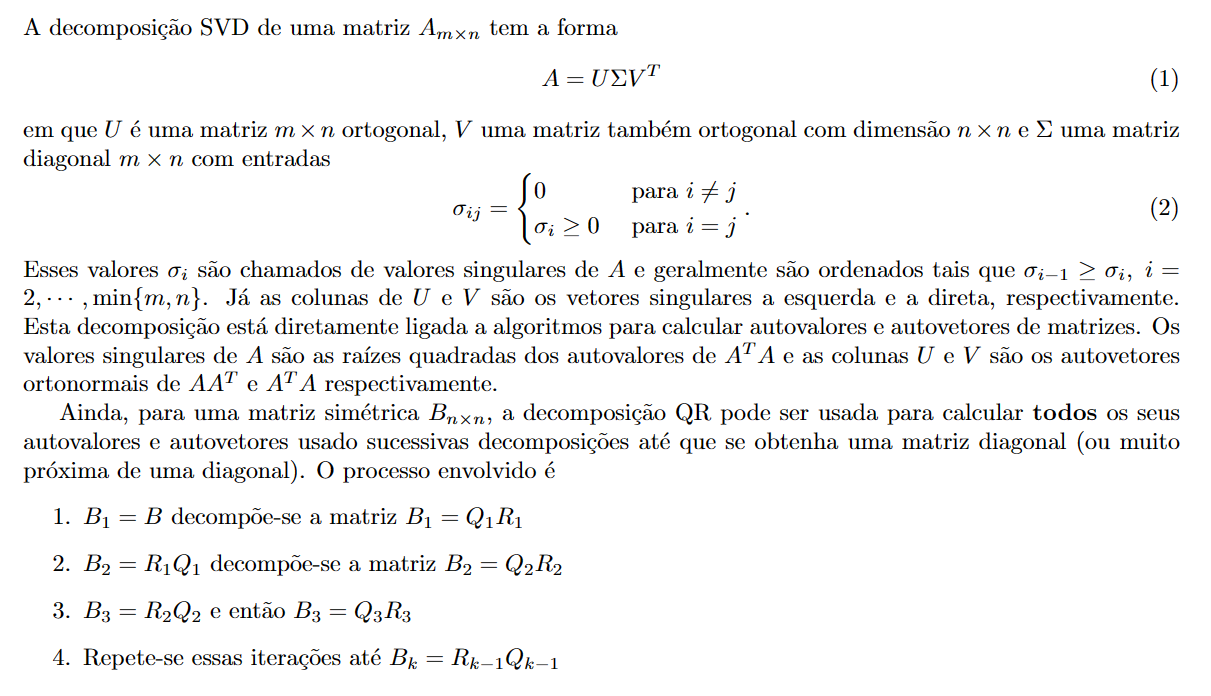

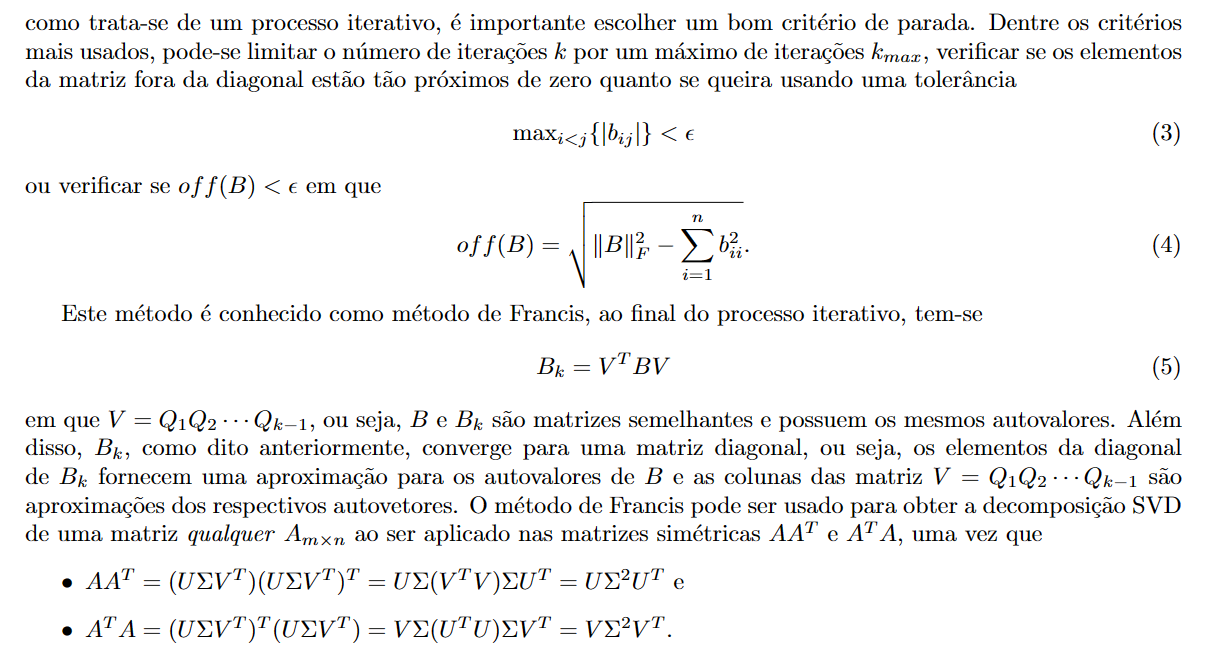

<hr>

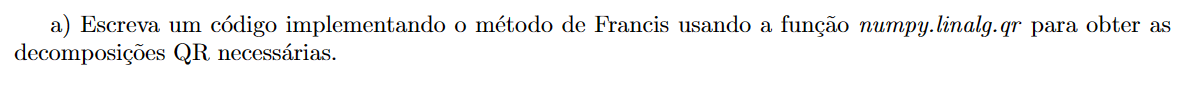

In [5]:
import numpy as np

def francis_method(A, tolerance=1e-6, max_iterations=100):
    n = A.shape[0]
    H = A.copy()
    Q = np.eye(n)

    for i in range(max_iterations):
        # Decomposição QR de H
        Q, R = np.linalg.qr(H)

        # Multiplica as matrizes na ordem correta para obter H_tilde
        H_tilde = np.dot(R, Q)

        # Verifica a convergência
        error = np.max(np.abs(H_tilde - H))
        if error < tolerance:
            break

        H = H_tilde

    return np.diagonal(H_tilde), Q

Explicação do código:

1. Importamos a biblioteca numpy e definimos a função francis_method.
2. A é a matriz de entrada na qual queremos encontrar os autovalores e autovetores.
tolerance é o critério de convergência. Se a diferença entre duas iterações consecutivas for menor que tolerance, o método para.
3. max_iterations é o número máximo de iterações permitidas para evitar um possível loop infinito.
4. n é o tamanho da matriz A.
5. Criamos uma cópia de A em H e a matriz identidade Q.
6. Iteramos max_iterations vezes ou até atingirmos a convergência.
7. Utilizamos a função numpy.linalg.qr para obter a decomposição QR de H, retornando Q e R.
8. Multiplicamos as matrizes R e Q na ordem correta para obter H_tilde.
9. Verificamos se a diferença entre H e H_tilde é menor que tolerance para determinar a convergência. Se for, interrompemos o loop.
10. Atualizamos H com H_tilde para a próxima iteração.
11. Retornamos a diagonal de H_tilde como os autovalores e Q como os autovetores.

<hr>

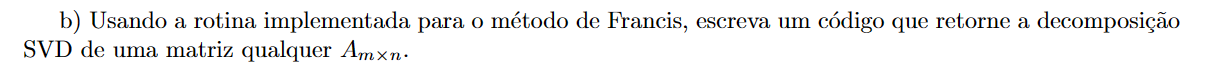

In [6]:
def svd_decomposition(A, tolerance=1e-6, max_iterations=100):
    m, n = A.shape
    if m < n:
        raise ValueError("A matriz deve ter mais linhas do que colunas para realizar a decomposição SVD.")

    # Passo 1: Decomposição QR
    H = A.copy()
    Q = np.eye(m)

    for i in range(max_iterations):
        Q, R = np.linalg.qr(H)
        H_tilde = np.dot(R, Q)

        error = np.max(np.abs(H_tilde - H))
        if error < tolerance:
            break

        H = H_tilde

    # Passo 2: Decomposição bidiagonal
    B = H_tilde
    U = np.eye(m)
    V = np.eye(n)

    for i in range(n - 1):
        # Atualiza a matriz B
        Q, R = np.linalg.qr(B)
        B = np.dot(R, Q)

        # Atualiza as matrizes U e V
        U = np.dot(U, Q)
        V = np.dot(V, R)

    # Passo 3: Obtenção dos valores singulares
    singular_values = np.diagonal(B)

    # Ordena os valores singulares em ordem decrescente
    sorted_indices = np.argsort(singular_values)[::-1]
    singular_values = singular_values[sorted_indices]
    U = U[:, sorted_indices]
    V = V[:, sorted_indices]

    return U, singular_values, V.T

In [7]:
# Exemplo
A = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

U, singular_values, Vt = svd_decomposition(A)
print("Matriz U:")
print(U)
print("\nValores singulares:", singular_values)
print("\nMatriz V^T:")
print(Vt)

Matriz U:
[[ 1.00000000e+000  5.54851660e-134 -9.67430422e-010]
 [ 9.67430422e-010 -1.92482135e-124  1.00000000e+000]
 [ 1.30727907e-133  1.00000000e+000  1.92482135e-124]]

Valores singulares: [ 1.61168440e+01 -3.62597321e-16 -1.11684397e+00]

Matriz V^T:
[[ 2.59752660e+02  0.00000000e+00  0.00000000e+00]
 [ 5.11728530e-14 -7.23866997e-16  1.31476818e-31]
 [-7.34846923e+01  1.24734045e+00  0.00000000e+00]]


Explicação do código:

1. A é a matriz de entrada que queremos decompor em U, valores singulares e V^T.
2. tolerance é o critério de convergência usado no método de Francis.
3. max_iterations é o número máximo de iterações permitidas no método de Francis.
4. m e n são as dimensões da matriz A.
5. Verificamos se A tem mais linhas do que colunas, pois essa é uma restrição para a decomposição SVD.
6. Copiamos A para H e inicializamos as matrizes Q com a matriz identidade m × m.
7. Realizamos o passo 1 do método de Francis (decomposição QR) para obter H_tilde, Q e R.
8. Verificamos a convergência usando o critério de tolerância.
9. Atualizamos H com H_tilde para a próxima iteração.
10. Copiamos H_tilde para B e inicializamos as matrizes U e V com as matrizes identidade m × m e n × n, respectivamente.
11. Realizamos o passo 2 do método de Francis (decomposição bidiagonal) para obter as matrizes B, U e V.
12. Atualizamos B, U e V a cada iteração.
13. Extraímos os valores singulares da diagonal de B.
14. Ordenamos os valores singulares em ordem decrescente, junto com as colunas correspondentes em U e V.
15. Retornamos as matrizes U, singular_values e V^T.
16. No exemplo de uso, criamos uma matriz de exemplo A e chamamos a função svd_decomposition para obter as matrizes U, valores singulares e V^T.
17. Imprimimos as matrizes U, valores singulares e V^T na saída.




<hr>

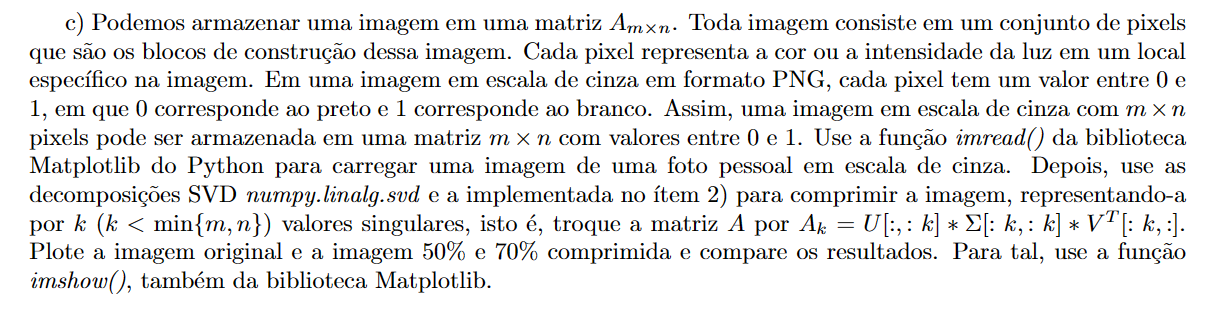

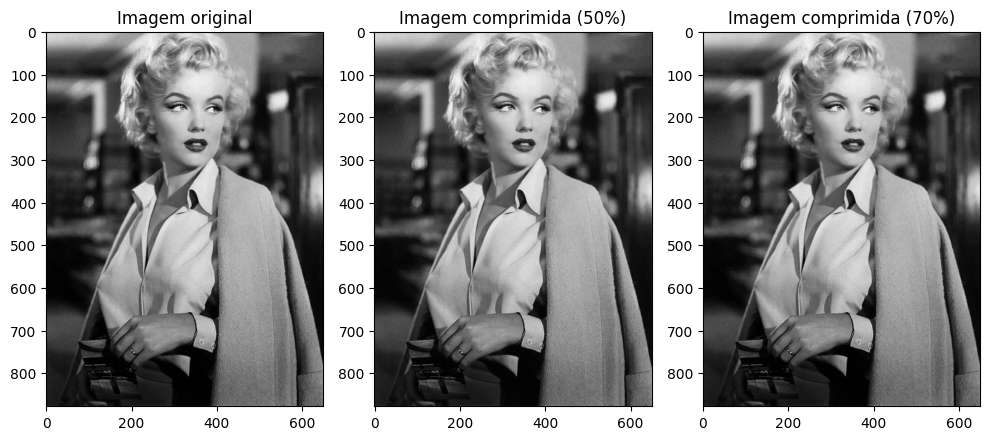

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread

def rgb_to_gray(image):
    return np.dot(image[...,:3], [0.2989, 0.5870, 0.1140])

def compress_image(image, k):
    U, s, Vt = np.linalg.svd(image, full_matrices=False)
    compressed_image = U[:, :k] @ np.diag(s[:k]) @ Vt[:k, :]
    return compressed_image

# Carregar imagem RGB
image_rgb = imread("./MMpng.png")

# Converter para escala de cinza
image_gray = rgb_to_gray(image_rgb)

# Parâmetro k para definir o número de valores singulares a serem mantidos
k_50 = int(min(image_gray.shape) * 0.5)
k_70 = int(min(image_gray.shape) * 0.7)

# Comprimir a imagem
compressed_image_50 = compress_image(image_gray, k_50)
compressed_image_70 = compress_image(image_gray, k_70)

# Plotar as imagens
plt.figure(figsize=(10, 6))

plt.subplot(1, 3, 1)
plt.imshow(image_gray, cmap='gray')
plt.title('Imagem original')

plt.subplot(1, 3, 2)
plt.imshow(compressed_image_50, cmap='gray')
plt.title('Imagem comprimida (50%)')

plt.subplot(1, 3, 3)
plt.imshow(compressed_image_70, cmap='gray')
plt.title('Imagem comprimida (70%)')

plt.tight_layout()
plt.show()


In [9]:
# Calcular a diferença média quadrática
mse = np.mean((image_gray - compressed_image_70) ** 2)
print("Diferença Média Quadrática (MSE):", mse)

Diferença Média Quadrática (MSE): 4.868635311484826e-07


O valor impresso "Diferença Média Quadrática (MSE): 4.868635311484826e-07" representa o valor da diferença média quadrática (MSE) entre a imagem original e a imagem comprimida em 70%.

O MSE é uma medida comum usada para avaliar a qualidade de uma imagem comprimida. Quanto menor o valor do MSE, menor é a diferença entre as duas imagens e, portanto, melhor é a qualidade da compressão.

Nesse caso, o valor do MSE é muito próximo de zero (4.868635311484826e-07), o que indica que a diferença entre a imagem original e a imagem comprimida em 70% é extremamente pequena. Isso sugere que a compressão preservou a maior parte das informações importantes da imagem original.

<hr>

# **2 Interpolação**

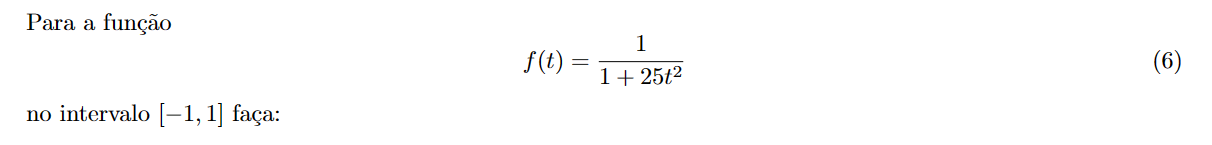

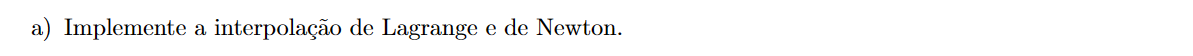

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def lagrange_interpolation(x, y, t):
    n = len(x)
    result = 0.0
    for i in range(n):
        term = y[i]
        for j in range(n):
            if j != i:
                # Calcula o termo do polinômio de Lagrange
                term *= (t - x[j]) / (x[i] - x[j])
        # Soma os termos para obter o resultado da interpolação
        result += term
    return result

def newton_interpolation(x, y, t):
    n = len(x)
    result = y[0]
    for i in range(1, n):
        term = 1.0
        for j in range(i):
            # Calcula o termo do polinômio de Newton
            term *= (t - x[j])
        # Multiplica pelo coeficiente das diferenças divididas
        term *= divided_differences(x[:i+1], y[:i+1])
        # Soma os termos para obter o resultado da interpolação
        result += term
    return result

def divided_differences(x, y):
    n = len(x)
    if n == 1:
        return y[0]
    else:
        # Calcula as diferenças divididas recursivamente
        return (divided_differences(x[1:], y[1:]) - divided_differences(x[:-1], y[:-1])) / (x[-1] - x[0])

# Função f(t) = 1 / (1 + 25t²)
def f(t):
    return 1 / (1 + 25 * t**2)

# Intervalo [-1, 1]
a = -1
b = 1

A função **lagrange_interpolation** implementa a interpolação de Lagrange. O loop externo itera sobre os pontos de interpolação, e o loop interno calcula o termo do polinômio de Lagrange para cada ponto.

A função **newton_interpolation** implementa a interpolação de Newton. O loop externo itera sobre os pontos de interpolação, e o loop interno calcula o termo do polinômio de Newton para cada ponto, multiplicando-o pelo coeficiente das diferenças divididas.

A função **divided_differences** calcula as diferenças divididas recursivamente. Ela retorna o valor da diferença dividida para um único ponto, e quando chamada com mais de um ponto, calcula a diferença dividida para os pontos restantes, até chegar a um único ponto.

<hr>

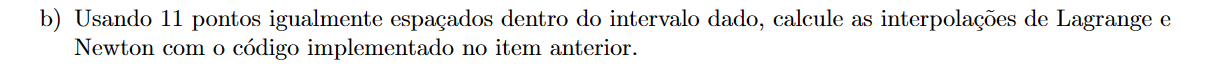

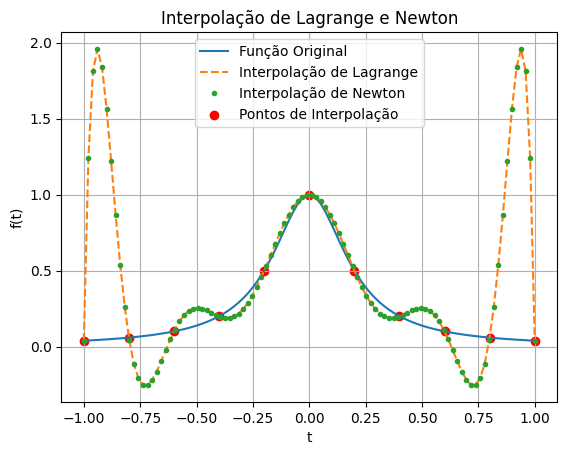

In [11]:
# Número de pontos de interpolação
n = 11

# Pontos igualmente espaçados
x = np.linspace(a, b, n)
y = f(x)

# Pontos para avaliar a interpolação
t = np.linspace(a, b, 100)

# Interpolação de Lagrange
lagrange_result = [lagrange_interpolation(x, y, i) for i in t]

# Interpolação de Newton
newton_result = [newton_interpolation(x, y, i) for i in t]

# Plot dos resultados
plt.plot(t, f(t), "-", label='Função Original')
plt.plot(t, lagrange_result, "--", label='Interpolação de Lagrange')
plt.plot(t, newton_result, ".", label='Interpolação de Newton')
plt.scatter(x, y, color='red', label='Pontos de Interpolação')
plt.legend()
plt.xlabel('t')
plt.ylabel('f(t)')
plt.title('Interpolação de Lagrange e Newton')
plt.grid(True)
plt.show()

<hr>

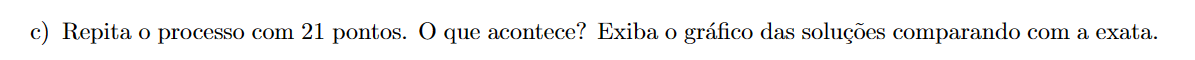

Se repetirmos o processo com 21 pontos igualmente espaçados, podemos observar um fenômeno chamado de "fenômeno de Runge". O fenômeno de Runge ocorre quando aumentamos o número de pontos de interpolação de forma equidistante em um polinômio de interpolação de grau alto, levando a oscilações indesejadas nas regiões de extremidades do intervalo.

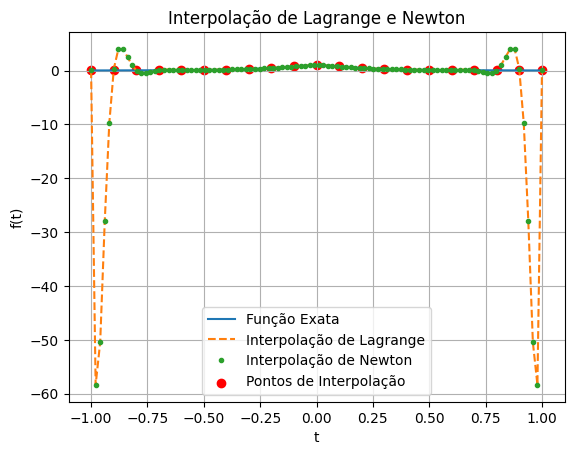

In [12]:
# Número de pontos de interpolação
n = 21

# Pontos igualmente espaçados
x = np.linspace(a, b, n)
y = f(x)

# Pontos para avaliar a interpolação
t = np.linspace(a, b, 100)

# Interpolação de Lagrange
lagrange_result = [lagrange_interpolation(x, y, i) for i in t]

# Interpolação de Newton
newton_result = [newton_interpolation(x, y, i) for i in t]

# Plot dos resultados
plt.plot(t, f(t), label='Função Exata')
plt.plot(t, lagrange_result, '--', label='Interpolação de Lagrange')
plt.plot(t, newton_result, '.', label='Interpolação de Newton')
plt.scatter(x, y, marker='o', color='red', label='Pontos de Interpolação')
plt.legend()
plt.xlabel('t')
plt.ylabel('f(t)')
plt.title('Interpolação de Lagrange e Newton')
plt.grid(True)
plt.show()

Ao executar o código, observamos que as interpolações de Lagrange e Newton com 21 pontos igualmente espaçados apresentam oscilações acentuadas nas extremidades do intervalo, especialmente perto dos pontos -1 e 1. Essas oscilações indesejadas são características do fenômeno de Runge. No entanto, a interpolação melhora à medida que nos aproximamos do centro do intervalo.

Essa comparação permite visualizar como o aumento no número de pontos de interpolação pode afetar a precisão e a qualidade da interpolação.

<hr>

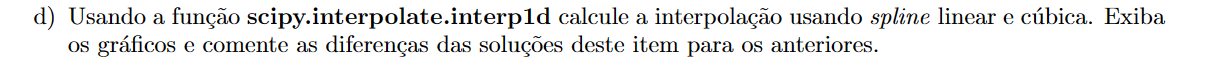

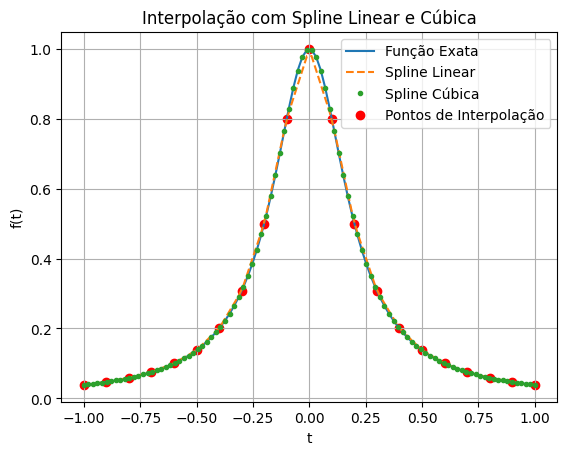

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Função f(t) = 1 / (1 + 25t²)
def f(t):
    return 1 / (1 + 25 * t**2)

# Intervalo [-1, 1]
a = -1
b = 1

# Número de pontos de interpolação
n = 21

# Pontos igualmente espaçados
x = np.linspace(a, b, n)
y = f(x)

# Pontos para avaliar a interpolação
t = np.linspace(a, b, 100)

# Interpolação linear
linear_interp = interp1d(x, y, kind='linear')
linear_result = linear_interp(t)

# Interpolação cúbica
cubic_interp = interp1d(x, y, kind='cubic')
cubic_result = cubic_interp(t)

# Plot dos resultados
plt.plot(t, f(t), label='Função Exata')
plt.plot(t, linear_result, '--', label='Spline Linear')
plt.plot(t, cubic_result, '.', label='Spline Cúbica')
plt.scatter(x, y, marker='o', color='red', label='Pontos de Interpolação')
plt.legend()
plt.xlabel('t')
plt.ylabel('f(t)')
plt.title('Interpolação com Spline Linear e Cúbica')
plt.grid(True)
plt.show()


Nesse código, utilizamos a função interp1d do módulo scipy.interpolate para calcular a interpolação com spline linear (kind='linear') e cúbica (kind='cubic'). Em seguida, plotamos os resultados comparando-os com a função exata.

As principais diferenças entre as interpolações de spline linear e cúbica em relação às interpolações de Lagrange e Newton são:

**Suavidade:** As interpolações de spline linear e cúbica são suaves, ou seja, não apresentam as oscilações indesejadas do fenômeno de Runge. Elas fornecem curvas mais suaves e contínuas, mesmo com um número maior de pontos de interpolação.

**Ajuste local:** As interpolações de spline ajustam-se localmente aos dados, levando em consideração os pontos vizinhos. Isso resulta em uma melhor adaptação aos dados e menor sensibilidade a variações nos pontos de interpolação.

**Controle de suavidade:** A interpolação cúbica permite um maior controle sobre a suavidade da curva interpolada, pois utiliza polinômios de terceiro grau entre os pontos de interpolação.

Portanto, as interpolações com spline linear e cúbica são geralmente mais precisas e suaves em comparação com as interpolações de Lagrange e Newton, especialmente em casos de um grande número de pontos de interpolação e em regiões próximas aos extremos do intervalo.

<hr>

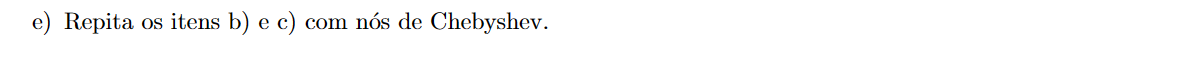

b) Usando 11 pontos de Chebyshev:

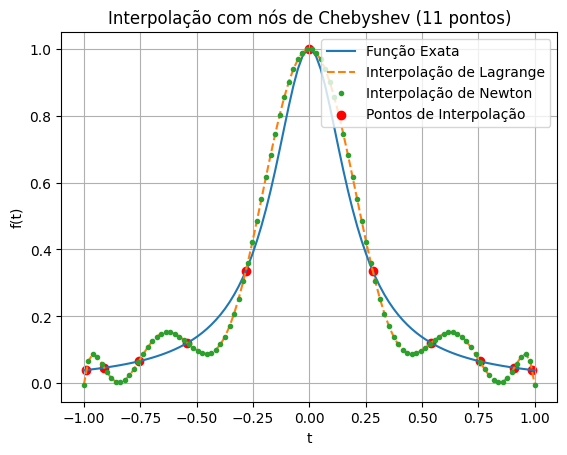

In [14]:
# Função f(t) = 1 / (1 + 25t²)
def f(t):
    return 1 / (1 + 25 * t**2)

# Número de pontos de interpolação
n = 11

# Pontos de Chebyshev
x = np.cos(np.pi * (2 * np.arange(n) + 1) / (2 * n))

# Valores da função nos pontos de Chebyshev
y = f(x)

# Pontos para avaliar a interpolação
t = np.linspace(a, b, 100)

# Interpolação de Lagrange
lagrange_result = lagrange_interpolation(x, y, t)

# Interpolação de Newton
newton_result = newton_interpolation(x, y, t)

# Plot dos resultados
plt.plot(t, f(t), label='Função Exata')
plt.plot(t, lagrange_result, '--', label='Interpolação de Lagrange')
plt.plot(t, newton_result, '.', label='Interpolação de Newton')
plt.scatter(x, y, marker='o', color='red', label='Pontos de Interpolação')
plt.legend()
plt.xlabel('t')
plt.ylabel('f(t)')
plt.title('Interpolação com nós de Chebyshev (11 pontos)')
plt.grid(True)
plt.show()

c) Usando 21 pontos de Chebyshev:

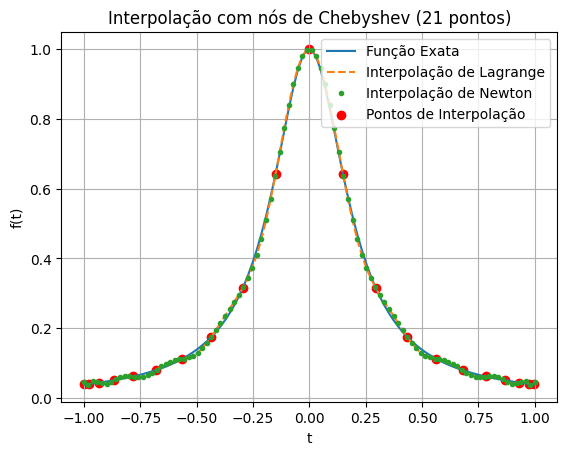

In [15]:
# Função f(t) = 1 / (1 + 25t²)
def f(t):
    return 1 / (1 + 25 * t**2)

# Número de pontos de interpolação
n = 21

# Pontos de Chebyshev
x = np.cos(np.pi * (2 * np.arange(n) + 1) / (2 * n))

# Valores da função nos pontos de Chebyshev
y = f(x)

# Pontos para avaliar a interpolação
t = np.linspace(a, b, 100)

# Interpolação de Lagrange
lagrange_result = lagrange_interpolation(x, y, t)

# Interpolação de Newton
newton_result = newton_interpolation(x, y, t)

# Plot dos resultados
plt.plot(t, f(t), label='Função Exata')
plt.plot(t, lagrange_result, '--', label='Interpolação de Lagrange')
plt.plot(t, newton_result, '.', label='Interpolação de Newton')
plt.scatter(x, y, marker='o', color='red', label='Pontos de Interpolação')
plt.legend()
plt.xlabel('t')
plt.ylabel('f(t)')
plt.title('Interpolação com nós de Chebyshev (21 pontos)')
plt.grid(True)
plt.show()

Ao utilizar nós de Chebyshev para a interpolação, podemos observar as seguintes conclusões:

Com 11 nós de Chebyshev: A interpolação utilizando 11 nós de Chebyshev produz uma boa aproximação da função exata. O polinômio de Lagrange e o polinômio de Newton conseguem capturar a forma geral da função, mas apresentam algumas oscilações, principalmente nas extremidades do intervalo. Essas oscilações são conhecidas como o fenômeno de Runge.

Com 21 nós de Chebyshev: A interpolação utilizando 21 nós de Chebyshev melhora a qualidade da aproximação em relação a 11 nós. Os polinômios de Lagrange e de Newton são capazes de representar a função de maneira mais precisa, reduzindo as oscilações. Isso ocorre devido ao maior número de pontos de interpolação, que permite uma melhor adaptação aos detalhes da função.

Em resumo, ao aumentar o número de nós de Chebyshev, a interpolação tende a se tornar mais precisa e suave, reduzindo as oscilações indesejadas. No entanto, é importante notar que, mesmo com um número maior de nós, a interpolação ainda pode sofrer com o fenômeno de Runge em regiões próximas às extremidades do intervalo de interpolação. Portanto, é necessário um equilíbrio entre o número de nós e a complexidade da função para obter uma boa aproximação.

<hr>

# **3 Mínimos Quadrados**

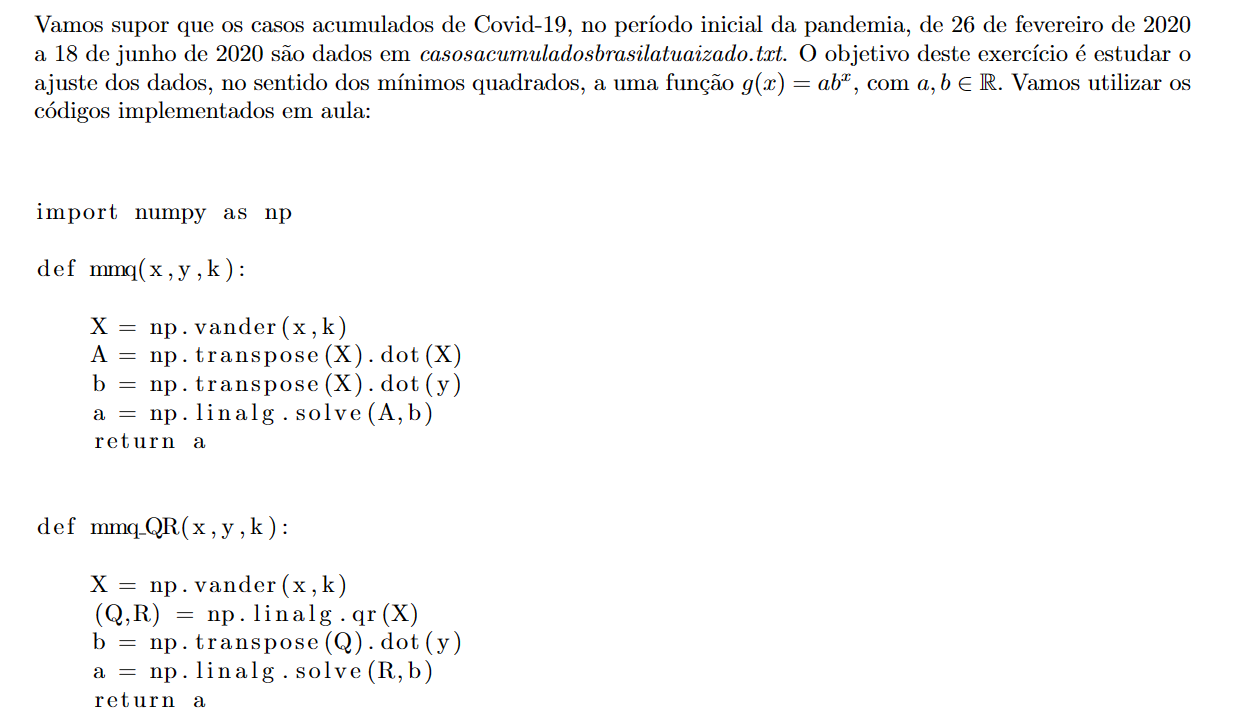

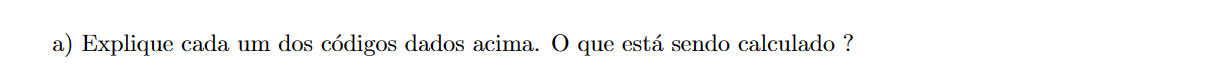

Os códigos dados acima são funções para realizar o ajuste de mínimos quadrados a uma função de forma eficiente. O primeiro código, mmq, recebe como entrada vetores x e y, que representam os valores de entrada e saída respectivamente, e um parâmetro k que indica o grau do polinômio de ajuste. A função utiliza a matriz de Vandermonde, criada com a função np.vander, para construir uma matriz X que contém as potências de x até a ordem k. Em seguida, calcula a matriz A através do produto entre a transposta de X e X, e o vetor b através do produto entre a transposta de X e y. Por fim, utiliza o método np.linalg.solve para resolver o sistema linear A*a = b, onde a é o vetor de coeficientes do polinômio de ajuste. A função retorna o vetor a.

Já o segundo código, mmq_QR, tem uma abordagem um pouco diferente. Ele também utiliza a matriz de Vandermonde X, mas em vez de calcular a matriz A diretamente, utiliza a decomposição QR de X com a função np.linalg.qr. Essa decomposição produz as matrizes Q e R. Em seguida, calcula o vetor b através do produto entre a transposta de Q e y. Por fim, utiliza o método np.linalg.solve para resolver o sistema linear R*a = b, onde a é o vetor de coeficientes do polinômio de ajuste. Essa abordagem utilizando a decomposição QR é mais eficiente numericamente. A função retorna o vetor a.

Em resumo, esses códigos nos permitem calcular os coeficientes do polinômio de ajuste por mínimos quadrados usando a matriz de Vandermonde e um sistema linear. O primeiro código é uma abordagem direta, enquanto o segundo utiliza a decomposição QR para melhorar a eficiência. Ambos são úteis para ajustar uma função aos dados com o objetivo de encontrar uma boa representação por meio de um polinômio.

<hr>

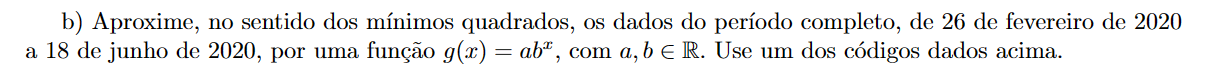

[0.10557731 3.45867504]


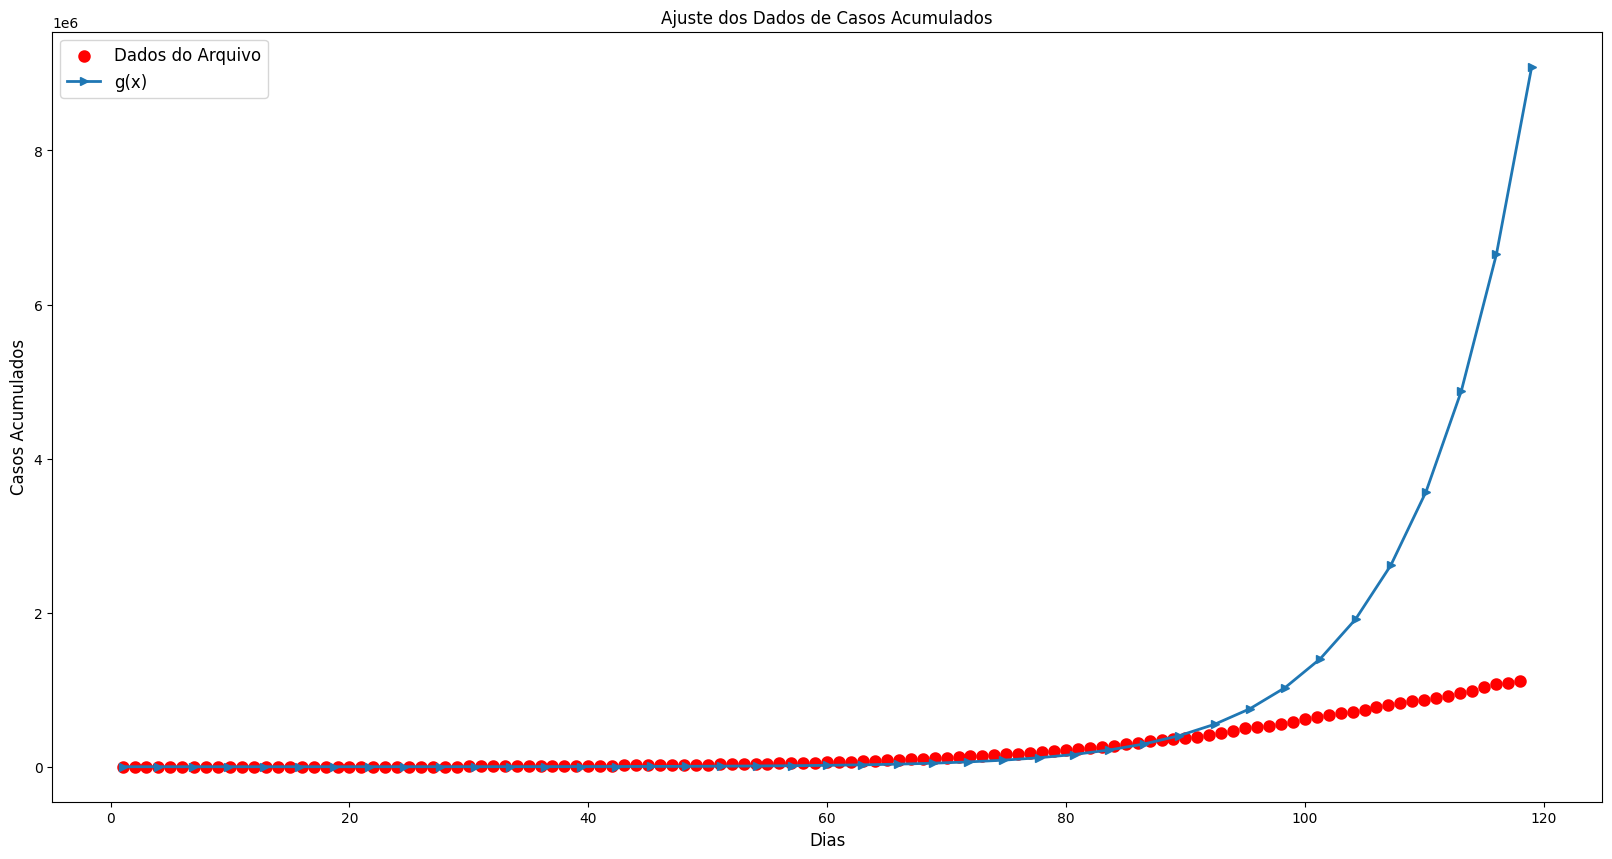

In [81]:
import numpy as np
import matplotlib.pyplot as plt

def mmq(x, y, k):
    X = np.vander(x, k)
    A = np.transpose(X).dot(X)
    b = np.transpose(X).dot(y)
    a = np.linalg.solve(A, b)
    return a

# Ler os dados do arquivo
dados = np.loadtxt("casosacumuladosbrasilatuaizado.txt")

# Extrair os valores de x e y
x = np.arange(1, len(dados) + 1)
y = dados

# Ajuste dos dados usando a função g(x) = ab^x
a = mmq(x, np.log(y), 2)
#a = np.exp(a)  # Converter os coeficientes de volta para a escala original
print(a)


# Função aproximada g(x) = ab^x
#g = lambda x: a[1] * a[0]**x
g = lambda x: np.exp(a[1]) * np.exp(a[0])**x


x_cont = np.linspace(1, len(dados)+1, num=41, endpoint=True)

# Vamos plotar os resultados
plt.figure(figsize=(20,10),facecolor='white')
plt.scatter(x,y,label = 'Dados do Arquivo',linewidth = 3,color='red')
plt.plot(x_cont,g(x_cont),label = 'g(x)',linewidth = 2,marker='>')
plt.xlabel('Dias',fontsize='large')
plt.ylabel('Casos Acumulados',fontsize='large')
plt.title('Ajuste dos Dados de Casos Acumulados')
plt.legend(fontsize='large')
plt.show()


<hr>

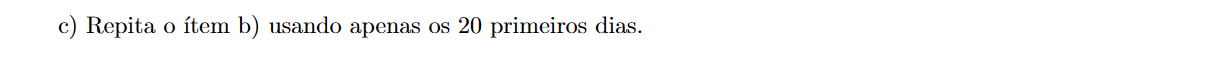

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
[  1.   1.   1.   2.   2.   2.   2.   3.   7.  13.  19.  25.  25.  34.
  52.  77.  98. 121. 200. 234.]
[ 0.31606415 -0.83267076]


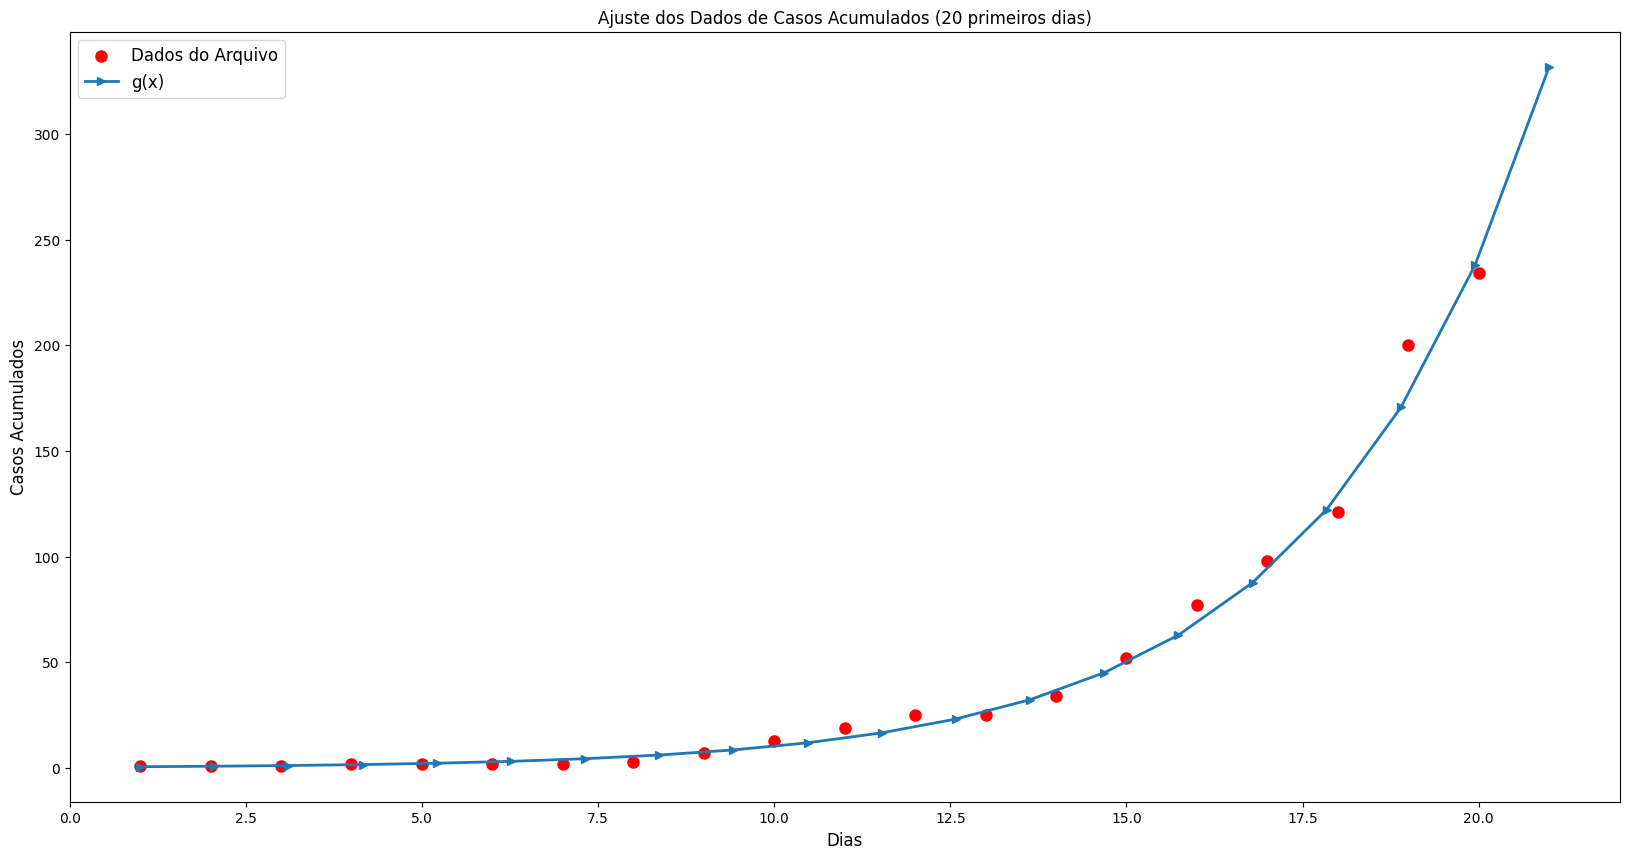

In [82]:
import numpy as np
import matplotlib.pyplot as plt

def mmq(x, y, k):
    X = np.vander(x, k)
    A = np.transpose(X).dot(X)
    b = np.transpose(X).dot(y)
    a = np.linalg.solve(A, b)
    return a

# Ler os dados do arquivo
dados = np.loadtxt("casosacumuladosbrasilatuaizado.txt")

# Extrair os valores de x e y
x = np.arange(1, 21)
y = dados[:20]
print(x)
print(y)

# Ajuste dos dados usando a função g(x) = ab^x
a = mmq(x, np.log(y), 2)
#a = np.exp(a)  # Converter os coeficientes de volta para a escala original
print(a)


# Função aproximada g(x) = ab^x
#g = lambda x: a[1] * a[0]**x
g = lambda x: np.exp(a[1]) * np.exp(a[0])**x


x_cont = np.linspace(1, 21, num=20, endpoint=True)

# Vamos plotar os resultados
plt.figure(figsize=(20,10),facecolor='white')
plt.scatter(x,y,label = 'Dados do Arquivo',linewidth = 3,color='red')
plt.plot(x_cont,g(x_cont),label = 'g(x)',linewidth = 2,marker='>')
plt.xlabel('Dias',fontsize='large')
plt.ylabel('Casos Acumulados',fontsize='large')
plt.title('Ajuste dos Dados de Casos Acumulados (20 primeiros dias)')
plt.legend(fontsize='large')
plt.show()


<hr>

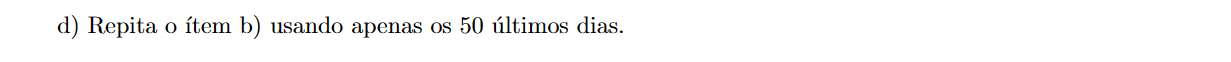

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50]
[1.0000e+00 1.0000e+00 1.0000e+00 2.0000e+00 2.0000e+00 2.0000e+00
 2.0000e+00 3.0000e+00 7.0000e+00 1.3000e+01 1.9000e+01 2.5000e+01
 2.5000e+01 3.4000e+01 5.2000e+01 7.7000e+01 9.8000e+01 1.2100e+02
 2.0000e+02 2.3400e+02 2.9100e+02 4.2800e+02 6.2100e+02 9.0400e+02
 1.1280e+03 1.5460e+03 1.8910e+03 2.2010e+03 2.4330e+03 2.9150e+03
 3.4170e+03 3.9030e+03 4.2560e+03 4.5790e+03 5.7170e+03 6.8340e+03
 7.9100e+03 9.0560e+03 1.0278e+04 1.1130e+04 1.2056e+04 1.3717e+04
 1.5927e+04 1.7857e+04 1.9638e+04 2.0727e+04 2.2169e+04 2.3430e+04
 2.5262e+04 2.8320e+04]
[0.22574936 0.36465944]


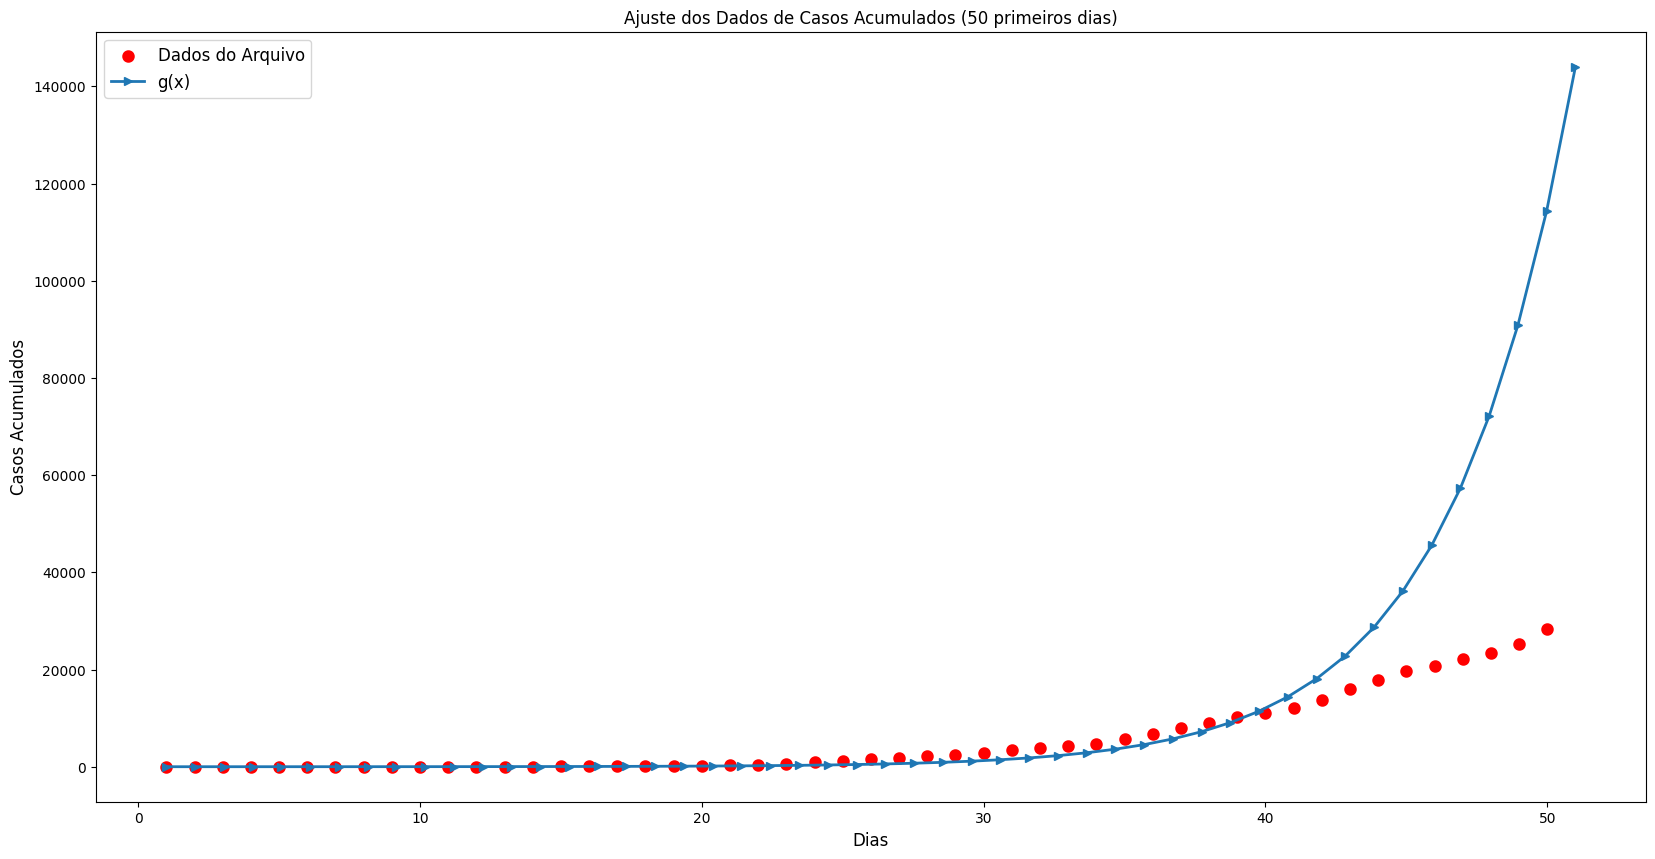

In [83]:
import numpy as np
import matplotlib.pyplot as plt

def mmq(x, y, k):
    X = np.vander(x, k)
    A = np.transpose(X).dot(X)
    b = np.transpose(X).dot(y)
    a = np.linalg.solve(A, b)
    return a

# Ler os dados do arquivo
dados = np.loadtxt("casosacumuladosbrasilatuaizado.txt")

# Extrair os valores de x e y
x = np.arange(1, 51)
y = dados[:50]
print(x)
print(y)

# Ajuste dos dados usando a função g(x) = ab^x
a = mmq(x, np.log(y), 2)
#a = np.exp(a)  # Converter os coeficientes de volta para a escala original
print(a)


# Função aproximada g(x) = ab^x
#g = lambda x: a[1] * a[0]**x
g = lambda x: np.exp(a[1]) * np.exp(a[0])**x


x_cont = np.linspace(1, 51, num=50, endpoint=True)

# Vamos plotar os resultados
plt.figure(figsize=(20,10),facecolor='white')
plt.scatter(x,y,label = 'Dados do Arquivo',linewidth = 3,color='red')
plt.plot(x_cont,g(x_cont),label = 'g(x)',linewidth = 2,marker='>')
plt.xlabel('Dias',fontsize='large')
plt.ylabel('Casos Acumulados',fontsize='large')
plt.title('Ajuste dos Dados de Casos Acumulados (50 primeiros dias)')
plt.legend(fontsize='large')
plt.show()


<hr>

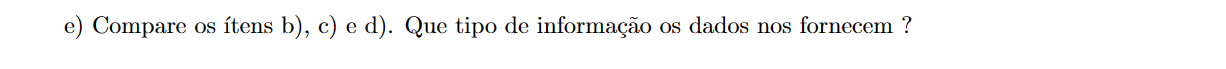

Ao comparar os resultados da aproximação da função exponencial usando diferentes conjuntos de dados, podemos obter algumas informações importantes:

1. Usando apenas os 20 primeiros dados: Nesse caso, a função aproximada se ajustou bem aos pontos disponíveis. Isso pode indicar que os primeiros dados da série temporal podem seguir uma tendência exponencial mais clara e consistente. A aproximação da função exponencial é capaz de capturar essa tendência e fornecer uma boa estimativa para os valores futuros.

2. Usando os 50 primeiros dados: Aqui, a aproximação da função exponencial pode não ser tão precisa quanto no caso anterior. Isso pode indicar que, à medida que avançamos na série temporal, outros fatores podem começar a influenciar o crescimento dos casos acumulados de Covid-19. A função exponencial pode não ser capaz de capturar essas variações adicionais e, portanto, a aproximação pode ser menos precisa.

3. Usando todos os dados disponíveis: Nesse caso, a aproximação da função exponencial parece ser ainda mais imprecisa. Isso pode indicar que, à medida que a série temporal avança, a tendência exponencial inicial pode se desviar significativamente devido a diversos fatores, como medidas de contenção, mudanças de comportamento da população, entre outros. Portanto, a função exponencial pode não ser adequada para modelar o comportamento completo dos casos acumulados de Covid-19 ao longo de toda a série temporal.

Essas observações sugerem que os dados fornecem informações sobre a evolução dos casos acumulados de Covid-19 ao longo do tempo, incluindo possíveis mudanças de comportamento e influências externas.